Preprocessing

In [220]:
import pandas as pd
df = pd.read_csv('/Volumes/CECORE512GB/Master/Social_data_analysis/reports.csv')
df.head()

/var/folders/52/cnr2_8nx2mncwgy2ygk46jpw0000gp/T/ipykernel_36969/2044752281.py:2: DtypeWarning: Columns (18,21,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Volumes/CECORE512GB/Master/Social_data_analysis/reports.csv')


,Row ID,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Incident ID,Incident Number,CAD Number,...,CNN,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Point,data_as_of,data_loaded_at
0,150750507041,2025/08/26 11:17:00 PM,2025/08/26,23:17,2025,Tuesday,2025/08/26 11:17:00 PM,1507505,250333102,NaN,...,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,2025/08/28 09:38:07 AM,2025/08/29 09:53:03 AM
1,150752104134,2025/08/27 12:37:00 AM,2025/08/27,00:37,2025,Wednesday,2025/08/27 12:37:00 AM,1507521,250479881,252390049.0,...,33557000.0,Park,Lone Mountain/USF,1.0,1.0,37.780415,-122.449013,POINT (-122.449012756 37.780414581),2025/08/28 09:38:07 AM,2025/08/29 09:53:03 AM
2,150762309027,2025/07/17 03:00:00 PM,2025/07/17,15:00,2025,Thursday,2025/08/27 11:55:00 AM,1507623,250480775,252391585.0,...,26469000.0,Park,Lone Mountain/USF,1.0,1.0,37.775177,-122.451355,POINT (-122.45135498 37.775177002),2025/08/28 09:38:07 AM,2025/08/29 09:53:03 AM
3,150740506244,2025/08/23 09:30:00 PM,2025/08/23,21:30,2025,Saturday,2025/08/24 02:53:00 PM,1507405,256091227,NaN,...,25905000.0,Northern,Hayes Valley,6.0,5.0,37.774551,-122.422501,POINT (-122.42250061 37.774551392),2025/08/27 09:38:07 AM,2025/08/28 09:53:00 AM
4,150723571000,2025/08/15 12:00:00 PM,2025/08/15,12:00,2025,Friday,2025/08/24 07:10:00 PM,1507235,256090348,NaN,...,26412000.0,Park,Haight Ashbury,5.0,5.0,37.769661,-122.449646,POINT (-122.449645996 37.76966095),2025/08/27 09:38:07 AM,2025/08/28 09:53:00 AM


In [221]:
df_new = df[['Incident Date', 'Incident Time', 'Incident Year', 'Incident Category', 'Police District', 'Latitude', 'Longitude']]

In [222]:
df_new = df_new.dropna()

In [223]:
# Dropping 2026 since it is not complete
df_new = df_new[df_new['Incident Year'] != 2026] 

New columns - Old columns
Incident Date - Date
Incident Time - Time
Incident Year - Need to be parsed from date
Incident Category - Category
Police District - PdDistrict
Latitude - Y
Longitude - X

In [224]:
df_old = pd.read_csv('/Volumes/CECORE512GB/Master/Social_data_analysis/old_reports.csv')
df_old.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,data_loaded_at
0,16020415607021,160204156,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Thursday,03/03/2016,19:30,TARAVAL,NONE,100 Block of BEPLER ST,-122.463545,37.707968,POINT (-122.463545017 37.707968365),2025/06/20 12:17:56 PM
1,14108723607025,141087236,7025,VEHICLE THEFT,STOLEN TRUCK,Friday,12/26/2014,15:30,MISSION,NONE,0 Block of FAIROAKS ST,-122.424435,37.755900,POINT (-122.424435192 37.755899626),2025/06/20 12:17:56 PM
2,11049313327195,110493133,27195,TRESPASS,TRESPASSING,Sunday,06/19/2011,13:06,TARAVAL,NONE,100 Block of APTOS AV,-122.466758,37.729185,POINT (-122.466758005 37.72918458),2025/06/20 12:17:56 PM
3,6102672004134,61026720,4134,ASSAULT,BATTERY,Monday,09/25/2006,22:15,NORTHERN,NONE,400 Block of FULTON ST,-122.425839,37.778486,POINT (-122.42583948 37.778486375),2025/06/20 12:17:56 PM
4,4072167065015,40721670,65015,OTHER OFFENSES,TRAFFIC VIOLATION,Thursday,06/24/2004,13:00,MISSION,"ARREST, CITED",FLORIDA ST / ALAMEDA ST,-120.500000,90.000000,POINT (-120.5 90),2025/06/20 12:17:56 PM


In [225]:
df_old = df_old[['Date', 'Time', 'Category', 'PdDistrict', 'Y', 'X']]
df_old

,Date,Time,Category,PdDistrict,Y,X
0,03/03/2016,19:30,VEHICLE THEFT,TARAVAL,37.707968,-122.463545
1,12/26/2014,15:30,VEHICLE THEFT,MISSION,37.755900,-122.424435
2,06/19/2011,13:06,TRESPASS,TARAVAL,37.729185,-122.466758
3,09/25/2006,22:15,ASSAULT,NORTHERN,37.778486,-122.425839
4,06/24/2004,13:00,OTHER OFFENSES,MISSION,90.000000,-120.500000
...,...,...,...,...,...,...
2071731,03/02/2008,22:00,BURGLARY,SOUTHERN,37.778601,-122.403562
2071732,08/23/2006,09:00,SUSPICIOUS OCC,MISSION,37.755020,-122.412052
2071733,09/23/2007,01:00,VANDALISM,INGLESIDE,37.742884,-122.427726
2071734,11/21/2013,18:20,MISSING PERSON,PARK,37.771727,-122.441394


In [226]:
df_old['Incident Year'] = df_old['Date'].str.extract(r'(\d{4})')
df_old

,Date,Time,Category,PdDistrict,Y,X,Incident Year
0,03/03/2016,19:30,VEHICLE THEFT,TARAVAL,37.707968,-122.463545,2016
1,12/26/2014,15:30,VEHICLE THEFT,MISSION,37.755900,-122.424435,2014
2,06/19/2011,13:06,TRESPASS,TARAVAL,37.729185,-122.466758,2011
3,09/25/2006,22:15,ASSAULT,NORTHERN,37.778486,-122.425839,2006
4,06/24/2004,13:00,OTHER OFFENSES,MISSION,90.000000,-120.500000,2004
...,...,...,...,...,...,...,...
2071731,03/02/2008,22:00,BURGLARY,SOUTHERN,37.778601,-122.403562,2008
2071732,08/23/2006,09:00,SUSPICIOUS OCC,MISSION,37.755020,-122.412052,2006
2071733,09/23/2007,01:00,VANDALISM,INGLESIDE,37.742884,-122.427726,2007
2071734,11/21/2013,18:20,MISSING PERSON,PARK,37.771727,-122.441394,2013


In [227]:
df_old = df_old[['Date', 'Time', 'Incident Year', 'Category', 'PdDistrict', 'Y', 'X']]
df_old

,Date,Time,Incident Year,Category,PdDistrict,Y,X
0,03/03/2016,19:30,2016,VEHICLE THEFT,TARAVAL,37.707968,-122.463545
1,12/26/2014,15:30,2014,VEHICLE THEFT,MISSION,37.755900,-122.424435
2,06/19/2011,13:06,2011,TRESPASS,TARAVAL,37.729185,-122.466758
3,09/25/2006,22:15,2006,ASSAULT,NORTHERN,37.778486,-122.425839
4,06/24/2004,13:00,2004,OTHER OFFENSES,MISSION,90.000000,-120.500000
...,...,...,...,...,...,...,...
2071731,03/02/2008,22:00,2008,BURGLARY,SOUTHERN,37.778601,-122.403562
2071732,08/23/2006,09:00,2006,SUSPICIOUS OCC,MISSION,37.755020,-122.412052
2071733,09/23/2007,01:00,2007,VANDALISM,INGLESIDE,37.742884,-122.427726
2071734,11/21/2013,18:20,2013,MISSING PERSON,PARK,37.771727,-122.441394


In [228]:
df_old = df_old.rename(columns={
    'Date': 'Incident Date',
    'Time': 'Incident Time',
    'Category': 'Incident Category',
    'PdDistrict': 'Police District',
    'Y': 'Latitude',
    'X': 'Longitude'
})
df_old

,Incident Date,Incident Time,Incident Year,Incident Category,Police District,Latitude,Longitude
0,03/03/2016,19:30,2016,VEHICLE THEFT,TARAVAL,37.707968,-122.463545
1,12/26/2014,15:30,2014,VEHICLE THEFT,MISSION,37.755900,-122.424435
2,06/19/2011,13:06,2011,TRESPASS,TARAVAL,37.729185,-122.466758
3,09/25/2006,22:15,2006,ASSAULT,NORTHERN,37.778486,-122.425839
4,06/24/2004,13:00,2004,OTHER OFFENSES,MISSION,90.000000,-120.500000
...,...,...,...,...,...,...,...
2071731,03/02/2008,22:00,2008,BURGLARY,SOUTHERN,37.778601,-122.403562
2071732,08/23/2006,09:00,2006,SUSPICIOUS OCC,MISSION,37.755020,-122.412052
2071733,09/23/2007,01:00,2007,VANDALISM,INGLESIDE,37.742884,-122.427726
2071734,11/21/2013,18:20,2013,MISSING PERSON,PARK,37.771727,-122.441394


In [229]:
df_new['Incident Date'] = pd.to_datetime(df_new['Incident Date'])
df_old['Incident Date'] = pd.to_datetime(df_old['Incident Date'])

In [230]:
df_new['Incident Year'] = df_new['Incident Year'].astype(int)
df_old['Incident Year'] = df_old['Incident Year'].astype(int)

In [231]:
df_new = df_new.apply(lambda x: x.str.upper() if x.dtype == 'object' else x)
df_new

,Incident Date,Incident Time,Incident Year,Incident Category,Police District,Latitude,Longitude
1,2025-08-27,00:37,2025,ASSAULT,PARK,37.780415,-122.449013
2,2025-07-17,15:00,2025,FRAUD,PARK,37.775177,-122.451355
3,2025-08-23,21:30,2025,LARCENY THEFT,NORTHERN,37.774551,-122.422501
4,2025-08-15,12:00,2025,LOST PROPERTY,PARK,37.769661,-122.449646
5,2025-08-15,21:45,2025,MOTOR VEHICLE THEFT,PARK,37.771572,-122.442184
...,...,...,...,...,...,...,...
1003932,2025-08-23,01:10,2025,OTHER MISCELLANEOUS,TENDERLOIN,37.776543,-122.417503
1003933,2025-03-02,00:00,2025,MOTOR VEHICLE THEFT,BAYVIEW,37.724678,-122.379509
1003934,2025-07-02,12:00,2025,MISSING PERSON,OUT OF SF,37.775272,-122.415909
1003935,2025-08-26,11:54,2025,ASSAULT,NORTHERN,37.804756,-122.435356


In [232]:
len(df_new['Incident Category'].unique())

49

In [233]:
len(df_old['Incident Category'].unique())

37

In [234]:
df_new['Incident Category'].unique()

array(['ASSAULT', 'FRAUD', 'LARCENY THEFT', 'LOST PROPERTY',
       'MOTOR VEHICLE THEFT', 'MISCELLANEOUS INVESTIGATION',
       'MALICIOUS MISCHIEF', 'OTHER MISCELLANEOUS', 'ARSON', 'WARRANT',
       'DISORDERLY CONDUCT', 'SUSPICIOUS OCC', 'DRUG OFFENSE', 'BURGLARY',
       'RECOVERED VEHICLE', 'COURTESY REPORT', 'TRAFFIC VIOLATION ARREST',
       'FORGERY AND COUNTERFEITING', 'NON-CRIMINAL', 'ROBBERY', 'OTHER',
       'CASE CLOSURE', 'VEHICLE IMPOUNDED', 'WEAPONS OFFENSE',
       'MISSING PERSON', 'SUICIDE', 'OTHER OFFENSES',
       'WEAPONS CARRYING ETC', 'TRAFFIC COLLISION',
       'OFFENCES AGAINST THE FAMILY AND CHILDREN', 'STOLEN PROPERTY',
       'VANDALISM', 'HOMICIDE', 'CIVIL SIDEWALKS', 'FIRE REPORT',
       'DRUG VIOLATION', 'GAMBLING', 'PROSTITUTION', 'VEHICLE MISPLACED',
       'EMBEZZLEMENT', 'SUSPICIOUS', 'SEX OFFENSE', 'LIQUOR LAWS',
       'WEAPONS OFFENCE', 'RAPE', 'MOTOR VEHICLE THEFT?',
       'HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS',
       'HUMAN TRAFFICKING,

In [235]:
df_old['Incident Category'].unique()

array(['VEHICLE THEFT', 'TRESPASS', 'ASSAULT', 'OTHER OFFENSES',
       'NON-CRIMINAL', 'MISSING PERSON', 'FRAUD', 'LARCENY/THEFT',
       'ROBBERY', 'ARSON', 'SUSPICIOUS OCC', 'KIDNAPPING', 'VANDALISM',
       'RECOVERED VEHICLE', 'WEAPON LAWS', 'WARRANTS', 'SECONDARY CODES',
       'BURGLARY', 'DRUG/NARCOTIC', 'SUICIDE', 'STOLEN PROPERTY',
       'DRUNKENNESS', 'LIQUOR LAWS', 'DRIVING UNDER THE INFLUENCE',
       'DISORDERLY CONDUCT', 'SEX OFFENSES, FORCIBLE', 'PROSTITUTION',
       'FORGERY/COUNTERFEITING', 'LOITERING', 'BRIBERY', 'EMBEZZLEMENT',
       'EXTORTION', 'BAD CHECKS', 'GAMBLING', 'PORNOGRAPHY/OBSCENE MAT',
       'SEX OFFENSES, NON FORCIBLE', 'TREA'], dtype=object)

In [236]:
df_old['Incident Category'] = df_old['Incident Category'].replace('VEHICLE THEFT', 'MOTOR VEHICLE THEFT')

In [237]:
df_old['Incident Category'].unique()

array(['MOTOR VEHICLE THEFT', 'TRESPASS', 'ASSAULT', 'OTHER OFFENSES',
       'NON-CRIMINAL', 'MISSING PERSON', 'FRAUD', 'LARCENY/THEFT',
       'ROBBERY', 'ARSON', 'SUSPICIOUS OCC', 'KIDNAPPING', 'VANDALISM',
       'RECOVERED VEHICLE', 'WEAPON LAWS', 'WARRANTS', 'SECONDARY CODES',
       'BURGLARY', 'DRUG/NARCOTIC', 'SUICIDE', 'STOLEN PROPERTY',
       'DRUNKENNESS', 'LIQUOR LAWS', 'DRIVING UNDER THE INFLUENCE',
       'DISORDERLY CONDUCT', 'SEX OFFENSES, FORCIBLE', 'PROSTITUTION',
       'FORGERY/COUNTERFEITING', 'LOITERING', 'BRIBERY', 'EMBEZZLEMENT',
       'EXTORTION', 'BAD CHECKS', 'GAMBLING', 'PORNOGRAPHY/OBSCENE MAT',
       'SEX OFFENSES, NON FORCIBLE', 'TREA'], dtype=object)

In [238]:
df_old['Incident Category'] = df_old['Incident Category'].replace(['TREA', 'TRESPASS'], 'TRESPASS')
df_old['Incident Category'].unique()

array(['MOTOR VEHICLE THEFT', 'TRESPASS', 'ASSAULT', 'OTHER OFFENSES',
       'NON-CRIMINAL', 'MISSING PERSON', 'FRAUD', 'LARCENY/THEFT',
       'ROBBERY', 'ARSON', 'SUSPICIOUS OCC', 'KIDNAPPING', 'VANDALISM',
       'RECOVERED VEHICLE', 'WEAPON LAWS', 'WARRANTS', 'SECONDARY CODES',
       'BURGLARY', 'DRUG/NARCOTIC', 'SUICIDE', 'STOLEN PROPERTY',
       'DRUNKENNESS', 'LIQUOR LAWS', 'DRIVING UNDER THE INFLUENCE',
       'DISORDERLY CONDUCT', 'SEX OFFENSES, FORCIBLE', 'PROSTITUTION',
       'FORGERY/COUNTERFEITING', 'LOITERING', 'BRIBERY', 'EMBEZZLEMENT',
       'EXTORTION', 'BAD CHECKS', 'GAMBLING', 'PORNOGRAPHY/OBSCENE MAT',
       'SEX OFFENSES, NON FORCIBLE'], dtype=object)

In [239]:
df_new['Incident Category'] = df_new['Incident Category'].replace(['MOTOR VEHICLE THEFT?', 'MOTOR VEHICLE THEFT'], 'MOTOR VEHICLE THEFT')
df_new['Incident Category'].unique()

array(['ASSAULT', 'FRAUD', 'LARCENY THEFT', 'LOST PROPERTY',
       'MOTOR VEHICLE THEFT', 'MISCELLANEOUS INVESTIGATION',
       'MALICIOUS MISCHIEF', 'OTHER MISCELLANEOUS', 'ARSON', 'WARRANT',
       'DISORDERLY CONDUCT', 'SUSPICIOUS OCC', 'DRUG OFFENSE', 'BURGLARY',
       'RECOVERED VEHICLE', 'COURTESY REPORT', 'TRAFFIC VIOLATION ARREST',
       'FORGERY AND COUNTERFEITING', 'NON-CRIMINAL', 'ROBBERY', 'OTHER',
       'CASE CLOSURE', 'VEHICLE IMPOUNDED', 'WEAPONS OFFENSE',
       'MISSING PERSON', 'SUICIDE', 'OTHER OFFENSES',
       'WEAPONS CARRYING ETC', 'TRAFFIC COLLISION',
       'OFFENCES AGAINST THE FAMILY AND CHILDREN', 'STOLEN PROPERTY',
       'VANDALISM', 'HOMICIDE', 'CIVIL SIDEWALKS', 'FIRE REPORT',
       'DRUG VIOLATION', 'GAMBLING', 'PROSTITUTION', 'VEHICLE MISPLACED',
       'EMBEZZLEMENT', 'SUSPICIOUS', 'SEX OFFENSE', 'LIQUOR LAWS',
       'WEAPONS OFFENCE', 'RAPE',
       'HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS',
       'HUMAN TRAFFICKING, COMMERCIAL SEX ACTS',
 

In [240]:

# Get unique categories from both dataframes
new_categories = sorted(df_new['Incident Category'].unique())
old_categories = sorted(df_old['Incident Category'].unique())

print("NEW DF Categories:")
for cat in new_categories:
    print(f"  - {cat}")
    
print("\nOLD DF Categories:")
for cat in old_categories:
    print(f"  - {cat}")


NEW DF Categories:
  - ARSON
  - ASSAULT
  - BURGLARY
  - CASE CLOSURE
  - CIVIL SIDEWALKS
  - COURTESY REPORT
  - DISORDERLY CONDUCT
  - DRUG OFFENSE
  - DRUG VIOLATION
  - EMBEZZLEMENT
  - FIRE REPORT
  - FORGERY AND COUNTERFEITING
  - FRAUD
  - GAMBLING
  - HOMICIDE
  - HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS
  - HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE
  - HUMAN TRAFFICKING, COMMERCIAL SEX ACTS
  - LARCENY THEFT
  - LIQUOR LAWS
  - LOST PROPERTY
  - MALICIOUS MISCHIEF
  - MISCELLANEOUS INVESTIGATION
  - MISSING PERSON
  - MOTOR VEHICLE THEFT
  - NON-CRIMINAL
  - OFFENCES AGAINST THE FAMILY AND CHILDREN
  - OTHER
  - OTHER MISCELLANEOUS
  - OTHER OFFENSES
  - PROSTITUTION
  - RAPE
  - RECOVERED VEHICLE
  - ROBBERY
  - SEX OFFENSE
  - STOLEN PROPERTY
  - SUICIDE
  - SUSPICIOUS
  - SUSPICIOUS OCC
  - TRAFFIC COLLISION
  - TRAFFIC VIOLATION ARREST
  - VANDALISM
  - VEHICLE IMPOUNDED
  - VEHICLE MISPLACED
  - WARRANT
  - WEAPONS CARRYING ETC
  - WEAPONS OFFENCE
  - WEAPONS OFFENS

# Category Matching Analysis: New DF vs Old DF

## Direct Matches (Same or Very Similar Names)
- ARSON → ARSON ✓
- ASSAULT → ASSAULT ✓
- BURGLARY → BURGLARY ✓
- DISORDERLY CONDUCT → DISORDERLY CONDUCT ✓
- EMBEZZLEMENT → EMBEZZLEMENT ✓
- FRAUD → FRAUD ✓
- GAMBLING → GAMBLING ✓
- LIQUOR LAWS → LIQUOR LAWS ✓
- MISSING PERSON → MISSING PERSON ✓
- MOTOR VEHICLE THEFT → MOTOR VEHICLE THEFT ✓
- NON-CRIMINAL → NON-CRIMINAL ✓
- OTHER OFFENSES → OTHER OFFENSES ✓
- PROSTITUTION → PROSTITUTION ✓
- RECOVERED VEHICLE → RECOVERED VEHICLE ✓
- ROBBERY → ROBBERY ✓
- STOLEN PROPERTY → STOLEN PROPERTY ✓
- SUICIDE → SUICIDE ✓
- SUSPICIOUS OCC → SUSPICIOUS OCC ✓
- VANDALISM → VANDALISM ✓

## Close Matches (Minor Naming Variations)
- FORGERY AND COUNTERFEITING → FORGERY/COUNTERFEITING ✓
- LARCENY THEFT → LARCENY/THEFT ✓
- WEAPONS OFFENCE / WEAPONS OFFENSE → WEAPON LAWS (likely match, though naming is different)

## Complex Matches (Multiple New Categories Map to One Old Category)
- DRUG OFFENSE + DRUG VIOLATION → DRUG/NARCOTIC (possible consolidation in new data)
- HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS + HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE → (no direct old equivalent - new categorization)
- SEX OFFENSE → Could be: SEX OFFENSES, FORCIBLE or SEX OFFENSES, NON FORCIBLE (split in old data)

## Ambiguous Cases (Require Human Judgment)
1. **HUMAN TRAFFICKING categories** - New data has detailed human trafficking categories; old data doesn't. These might be:
   - New categorizations not in old data
   - Or previously coded under different categories (prostitution, assault, etc.)

2. **CASE CLOSURE, CIVIL SIDEWALKS, COURTESY REPORT, FIRE REPORT, MISCELLANEOUS INVESTIGATION, NON-CRIMINAL, VEHICLE IMPOUNDED, VEHICLE MISPLACED, WARRANT vs WARRANTS** - These administrative/miscellaneous categories don't have clear matches in old data

3. **OLD ONLY categories with no clear NEW match:**
   - BAD CHECKS
   - BRIBERY
   - DRIVING UNDER THE INFLUENCE
   - DRUNKENNESS
   - EXTORTION
   - KIDNAPPING
   - LOITERING
   - PORNOGRAPHY/OBSCENE MAT
   - SECONDARY CODES (likely administrative)
   - TRESPASS (was mentioned but might be merged elsewhere)

## Recommendations for Next Steps
1. Check if old categories like KIDNAPPING, EXTORTION, BRIBERY appear under different names in new data
2. Verify WEAPONS categorization (WEAPONS CARRYING ETC, WEAPONS OFFENCE, WEAPONS OFFENSE in new data vs WEAPON LAWS in old)
3. Investigate how human trafficking was coded in old data (if at all)
4. Clarify what happened to TRESPASS (you merged TREA into it earlier)


Final categories chosen (high confidence in the mapping):
Old name = new name = final name
- ARSON → ARSON
- ASSAULT → ASSAULT
- BURGLARY → BURGLARY
- DISORDERLY CONDUCT → DISORDERLY CONDUCT
- EMBEZZLEMENT → EMBEZZLEMENT
- FRAUD → FRAUD
- GAMBLING → GAMBLING
- LIQUOR LAWS → LIQUOR LAWS
- MISSING PERSON → MISSING PERSON
- MOTOR VEHICLE THEFT → MOTOR VEHICLE THEFT
- RECOVERED VEHICLE → RECOVERED VEHICLE
- ROBBERY → ROBBERY
- STOLEN PROPERTY → STOLEN PROPERTY
- SUICIDE → SUICIDE
- VANDALISM → VANDALISM

Removed from the list provided by the LLM Non-criminal (I thought it could be less interesting to analyse), Other offenses (I thought it could be less interesting to analyse), Prostitution (maybe related with sex offenses), SUSPICIOUS OCC since it was vague.

In [241]:
# Filter df_old and df_new to keep only specified categories
# First, rename DRUG VIOLATION to DRUG OFFENSE and WARRANTS to WARRANT in both datasets
df_old['Incident Category'] = df_old['Incident Category'].replace({
    'DRUG/NARCOTIC': 'DRUG OFFENSE',
    'WARRANTS': 'WARRANT'
})

df_new['Incident Category'] = df_new['Incident Category'].replace({
    'DRUG VIOLATION': 'DRUG OFFENSE',
    'WARRANTS': 'WARRANT'
})

categories_to_keep = [
    'ARSON',
    'ASSAULT',
    'BURGLARY',
    'DISORDERLY CONDUCT',
    'EMBEZZLEMENT',
    'FRAUD',
    'GAMBLING',
    'LIQUOR LAWS',
    'MISSING PERSON',
    'MOTOR VEHICLE THEFT',
    'RECOVERED VEHICLE',
    'ROBBERY',
    'STOLEN PROPERTY',
    'SUICIDE',
    'DRUG OFFENSE',
    'WARRANT'
]

print("=" * 80)
print("FILTERING TO KEEP ONLY SPECIFIED CATEGORIES")
print("=" * 80)

# Filter df_old
df_old = df_old[df_old['Incident Category'].isin(categories_to_keep)].copy()
print(f"\ndf_old filtered to {len(df_old):,} records")
print(f"Unique categories in df_old: {df_old['Incident Category'].nunique()}")

# Filter df_new
df_new = df_new[df_new['Incident Category'].isin(categories_to_keep)].copy()
print(f"\ndf_new filtered to {len(df_new):,} records")
print(f"Unique categories in df_new: {df_new['Incident Category'].nunique()}")

print(f"\nCategories kept in both datasets:")
for cat in sorted(df_old['Incident Category'].unique()):
    old_count = len(df_old[df_old['Incident Category'] == cat])
    new_count = len(df_new[df_new['Incident Category'] == cat])
    print(f"  {cat:<30} | Old: {old_count:>6} | New: {new_count:>6}")

FILTERING TO KEEP ONLY SPECIFIED CATEGORIES

df_old filtered to 783,465 records
Unique categories in df_old: 16

df_new filtered to 370,845 records
Unique categories in df_new: 16

Categories kept in both datasets:
  ARSON                          | Old:   3875 | New:   2924
  ASSAULT                        | Old: 167042 | New:  64381
  BURGLARY                       | Old:  91067 | New:  55330
  DISORDERLY CONDUCT             | Old:   9932 | New:  18523
  DRUG OFFENSE                   | Old: 117821 | New:  30640
  EMBEZZLEMENT                   | Old:   2984 | New:   1257
  FRAUD                          | Old:  41348 | New:  32697
  GAMBLING                       | Old:    343 | New:     66
  LIQUOR LAWS                    | Old:   2840 | New:    147
  MISSING PERSON                 | Old:  44268 | New:  22461
  MOTOR VEHICLE THEFT            | Old: 126228 | New:  54210
  RECOVERED VEHICLE              | Old:   8688 | New:  28103
  ROBBERY                        | Old:  54467 | New:

In [242]:
df_new

,Incident Date,Incident Time,Incident Year,Incident Category,Police District,Latitude,Longitude
1,2025-08-27,00:37,2025,ASSAULT,PARK,37.780415,-122.449013
2,2025-07-17,15:00,2025,FRAUD,PARK,37.775177,-122.451355
5,2025-08-15,21:45,2025,MOTOR VEHICLE THEFT,PARK,37.771572,-122.442184
13,2025-08-26,11:00,2025,ARSON,TENDERLOIN,37.782074,-122.412224
15,2025-08-26,07:00,2025,WARRANT,TENDERLOIN,37.783215,-122.410767
...,...,...,...,...,...,...,...
1003931,2025-08-25,02:45,2025,RECOVERED VEHICLE,SOUTHERN,37.778786,-122.410400
1003933,2025-03-02,00:00,2025,MOTOR VEHICLE THEFT,BAYVIEW,37.724678,-122.379509
1003934,2025-07-02,12:00,2025,MISSING PERSON,OUT OF SF,37.775272,-122.415909
1003935,2025-08-26,11:54,2025,ASSAULT,NORTHERN,37.804756,-122.435356


In [243]:
df_old

,Incident Date,Incident Time,Incident Year,Incident Category,Police District,Latitude,Longitude
0,2016-03-03,19:30,2016,MOTOR VEHICLE THEFT,TARAVAL,37.707968,-122.463545
1,2014-12-26,15:30,2014,MOTOR VEHICLE THEFT,MISSION,37.755900,-122.424435
3,2006-09-25,22:15,2006,ASSAULT,NORTHERN,37.778486,-122.425839
5,2005-07-23,16:40,2005,ASSAULT,INGLESIDE,37.708311,-122.420084
7,2015-03-10,00:01,2015,ASSAULT,SOUTHERN,37.775421,-122.403405
...,...,...,...,...,...,...,...
2071726,2004-04-30,16:00,2004,DISORDERLY CONDUCT,MISSION,37.763698,-122.415156
2071728,2006-01-23,10:40,2006,DRUG OFFENSE,MISSION,37.765336,-122.415873
2071731,2008-03-02,22:00,2008,BURGLARY,SOUTHERN,37.778601,-122.403562
2071734,2013-11-21,18:20,2013,MISSING PERSON,PARK,37.771727,-122.441394


In [244]:
print(len(df_new['Incident Category'].unique()))
print(len(df_old['Incident Category'].unique()))

16
16


In [245]:
print("=" * 80)
print("STEP 1: STANDARDIZE COLUMN NAMES")
print("=" * 80)

# Check current column names
print("\ndf_old columns:", df_old.columns.tolist())
print("df_new columns:", df_new.columns.tolist())

# Standardize to common column names (both already have the same structure)
# Both have: Incident Date, Incident Time, Incident Year, Incident Category, Police District, Latitude, Longitude

print("\n✓ Column names already standardized!")

print("\n" + "=" * 80)
print("STEP 2: PREPARE DATASETS FOR MERGING")
print("=" * 80)

# Ensure consistent data types
df_old['Incident Date'] = pd.to_datetime(df_old['Incident Date'])
df_new['Incident Date'] = pd.to_datetime(df_new['Incident Date'])
df_old['Incident Year'] = df_old['Incident Year'].astype(int)
df_new['Incident Year'] = df_new['Incident Year'].astype(int)

print(f"\ndf_old: {len(df_old):,} records | Years: {df_old['Incident Year'].min()} to {df_old['Incident Year'].max()}")
print(f"df_new: {len(df_new):,} records | Years: {df_new['Incident Year'].min()} to {df_new['Incident Year'].max()}")

print("\n" + "=" * 80)
print("STEP 3: CHECK FOR OVERLAP PERIOD (May 2018)")
print("=" * 80)

# Check May 2018 specifically
old_may_2018 = df_old[(df_old['Incident Year'] == 2018) & 
                       (df_old['Incident Date'].dt.month == 5)]
new_may_2018 = df_new[(df_new['Incident Year'] == 2018) & 
                       (df_new['Incident Date'].dt.month == 5)]

print(f"\nRecords in df_old for May 2018: {len(old_may_2018)}")
print(f"Records in df_new for May 2018: {len(new_may_2018)}")

if len(old_may_2018) > 0:
    print(f"Date range in df_old for May 2018: {old_may_2018['Incident Date'].min()} to {old_may_2018['Incident Date'].max()}")
if len(new_may_2018) > 0:
    print(f"Date range in df_new for May 2018: {new_may_2018['Incident Date'].min()} to {new_may_2018['Incident Date'].max()}")

print("\n" + "=" * 80)
print("STEP 4: REMOVE 2018 DATA FROM OLD DATASET")
print("=" * 80)

# Remove 2018 from df_old to avoid overlap - will use 2018 data from df_new only
old_pre_2018 = len(df_old)
df_old = df_old[df_old['Incident Year'] != 2018].copy()
old_post_2018 = len(df_old)
print(f"\nRemoved 2018 records from df_old:")
print(f"  Before: {old_pre_2018:,} records")
print(f"  After: {old_post_2018:,} records")
print(f"  Removed: {old_pre_2018 - old_post_2018:,} records")

print("\n" + "=" * 80)
print("STEP 5: CONCATENATE DATASETS")
print("=" * 80)

# Add source column to track which dataset each record came from
df_old['Source'] = 'Historical'
df_new['Source'] = 'Recent'

# Concatenate the datasets
df_merged = pd.concat([df_old, df_new], ignore_index=True)

print(f"\nMerged dataset size: {len(df_merged):,} records")
print(f"Date range: {df_merged['Incident Date'].min()} to {df_merged['Incident Date'].max()}")
print(f"Year range: {df_merged['Incident Year'].min()} to {df_merged['Incident Year'].max()}")
print(f"\nSource breakdown:")
print(df_merged['Source'].value_counts())

print("\n" + "=" * 80)
print("STEP 6: CHECK FOR AND REMOVE DUPLICATES")
print("=" * 80)

# Identify potential duplicates using key fields
# (Incident Date, Time, Category, Police District, Latitude, Longitude)
duplicate_cols = ['Incident Date', 'Incident Time', 'Incident Category', 'Police District', 'Latitude', 'Longitude']

duplicates = df_merged[df_merged.duplicated(subset=duplicate_cols, keep=False)].sort_values(by=duplicate_cols)

print(f"\nPotential exact duplicates found: {len(duplicates)}")

if len(duplicates) > 0:
    print("\nFirst few duplicate records:")
    print(duplicates[['Incident Date', 'Incident Time', 'Incident Category', 'Police District', 'Source']].head(10))
    
    # Remove duplicates, keeping the first occurrence
    df_merged = df_merged.drop_duplicates(subset=duplicate_cols, keep='first')
    print(f"\nDuplicates removed. New merged dataset size: {len(df_merged):,} records")
else:
    print("No exact duplicates found - datasets are clean!")

print("\n" + "=" * 80)
print("STEP 7: FINAL MERGED DATASET")
print("=" * 80)

print(f"\nFinal merged dataset:")
print(f"  Total records: {len(df_merged):,}")
print(f"  Date range: {df_merged['Incident Date'].min().date()} to {df_merged['Incident Date'].max().date()}")
print(f"  Year range: {df_merged['Incident Year'].min()} to {df_merged['Incident Year'].max()}")
print(f"  Unique categories: {df_merged['Incident Category'].nunique()}")
print(f"  Unique locations: {df_merged[['Latitude', 'Longitude']].drop_duplicates().shape[0]}")

print("\nColumn structure:")
print(df_merged.info())

print("\n" + "=" * 80)
print("STEP 8: SAVE MERGED DATASET")
print("=" * 80)

# Save the merged dataset
output_filename = 'merged_crime_data.csv'
df_merged.to_csv(output_filename, index=False)
print(f"\n✓ Merged dataset saved as: {output_filename}")

# Display first and last few rows
print("\nFirst 5 rows of merged dataset:")
print(df_merged.head())

print("\nLast 5 rows of merged dataset:")
print(df_merged.tail())


STEP 1: STANDARDIZE COLUMN NAMES

df_old columns: ['Incident Date', 'Incident Time', 'Incident Year', 'Incident Category', 'Police District', 'Latitude', 'Longitude']
df_new columns: ['Incident Date', 'Incident Time', 'Incident Year', 'Incident Category', 'Police District', 'Latitude', 'Longitude']

✓ Column names already standardized!

STEP 2: PREPARE DATASETS FOR MERGING

df_old: 783,465 records | Years: 2003 to 2018
df_new: 370,845 records | Years: 2018 to 2025

STEP 3: CHECK FOR OVERLAP PERIOD (May 2018)

Records in df_old for May 2018: 1138
Records in df_new for May 2018: 4368
Date range in df_old for May 2018: 2018-05-01 00:00:00 to 2018-05-15 00:00:00
Date range in df_new for May 2018: 2018-05-01 00:00:00 to 2018-05-31 00:00:00

STEP 4: REMOVE 2018 DATA FROM OLD DATASET

Removed 2018 records from df_old:
  Before: 783,465 records
  After: 769,597 records
  Removed: 13,868 records

STEP 5: CONCATENATE DATASETS

Merged dataset size: 1,140,442 records
Date range: 2003-01-01 00:00:0

In [246]:
df_merged.drop('Source', axis=1)

,Incident Date,Incident Time,Incident Year,Incident Category,Police District,Latitude,Longitude
0,2016-03-03,19:30,2016,MOTOR VEHICLE THEFT,TARAVAL,37.707968,-122.463545
1,2014-12-26,15:30,2014,MOTOR VEHICLE THEFT,MISSION,37.755900,-122.424435
2,2006-09-25,22:15,2006,ASSAULT,NORTHERN,37.778486,-122.425839
3,2005-07-23,16:40,2005,ASSAULT,INGLESIDE,37.708311,-122.420084
4,2015-03-10,00:01,2015,ASSAULT,SOUTHERN,37.775421,-122.403405
...,...,...,...,...,...,...,...
1140437,2025-08-25,02:45,2025,RECOVERED VEHICLE,SOUTHERN,37.778786,-122.410400
1140438,2025-03-02,00:00,2025,MOTOR VEHICLE THEFT,BAYVIEW,37.724678,-122.379509
1140439,2025-07-02,12:00,2025,MISSING PERSON,OUT OF SF,37.775272,-122.415909
1140440,2025-08-26,11:54,2025,ASSAULT,NORTHERN,37.804756,-122.435356


YEARLY CRIME TRENDS VISUALIZATION (2003-2025)

Data range: 2003 to 2025
Total records: 1,012,816

Plotting trends for 16 crime categories...

ARSON                          | Total:   6458 | Min:   189 (2011) | Max:   404 (2020)
ASSAULT                        | Total: 207126 | Min:  6157 (2020) | Max: 10706 (2003)
BURGLARY                       | Total: 139085 | Min:  4165 (2025) | Max:  8519 (2020)
DISORDERLY CONDUCT             | Total:  27310 | Min:   338 (2014) | Max:  2620 (2019)
EMBEZZLEMENT                   | Total:   4073 | Min:    83 (2025) | Max:   265 (2007)
FRAUD                          | Total:  68205 | Min:  2254 (2007) | Max:  4264 (2022)
GAMBLING                       | Total:    378 | Min:     1 (2021) | Max:    37 (2007)
LIQUOR LAWS                    | Total:   2950 | Min:     2 (2020) | Max:   350 (2008)
MISSING PERSON                 | Total:  54479 | Min:  1854 (2003) | Max:  3327 (2018)
MOTOR VEHICLE THEFT            | Total: 151234 | Min:  3919 (2025) | Max: 1

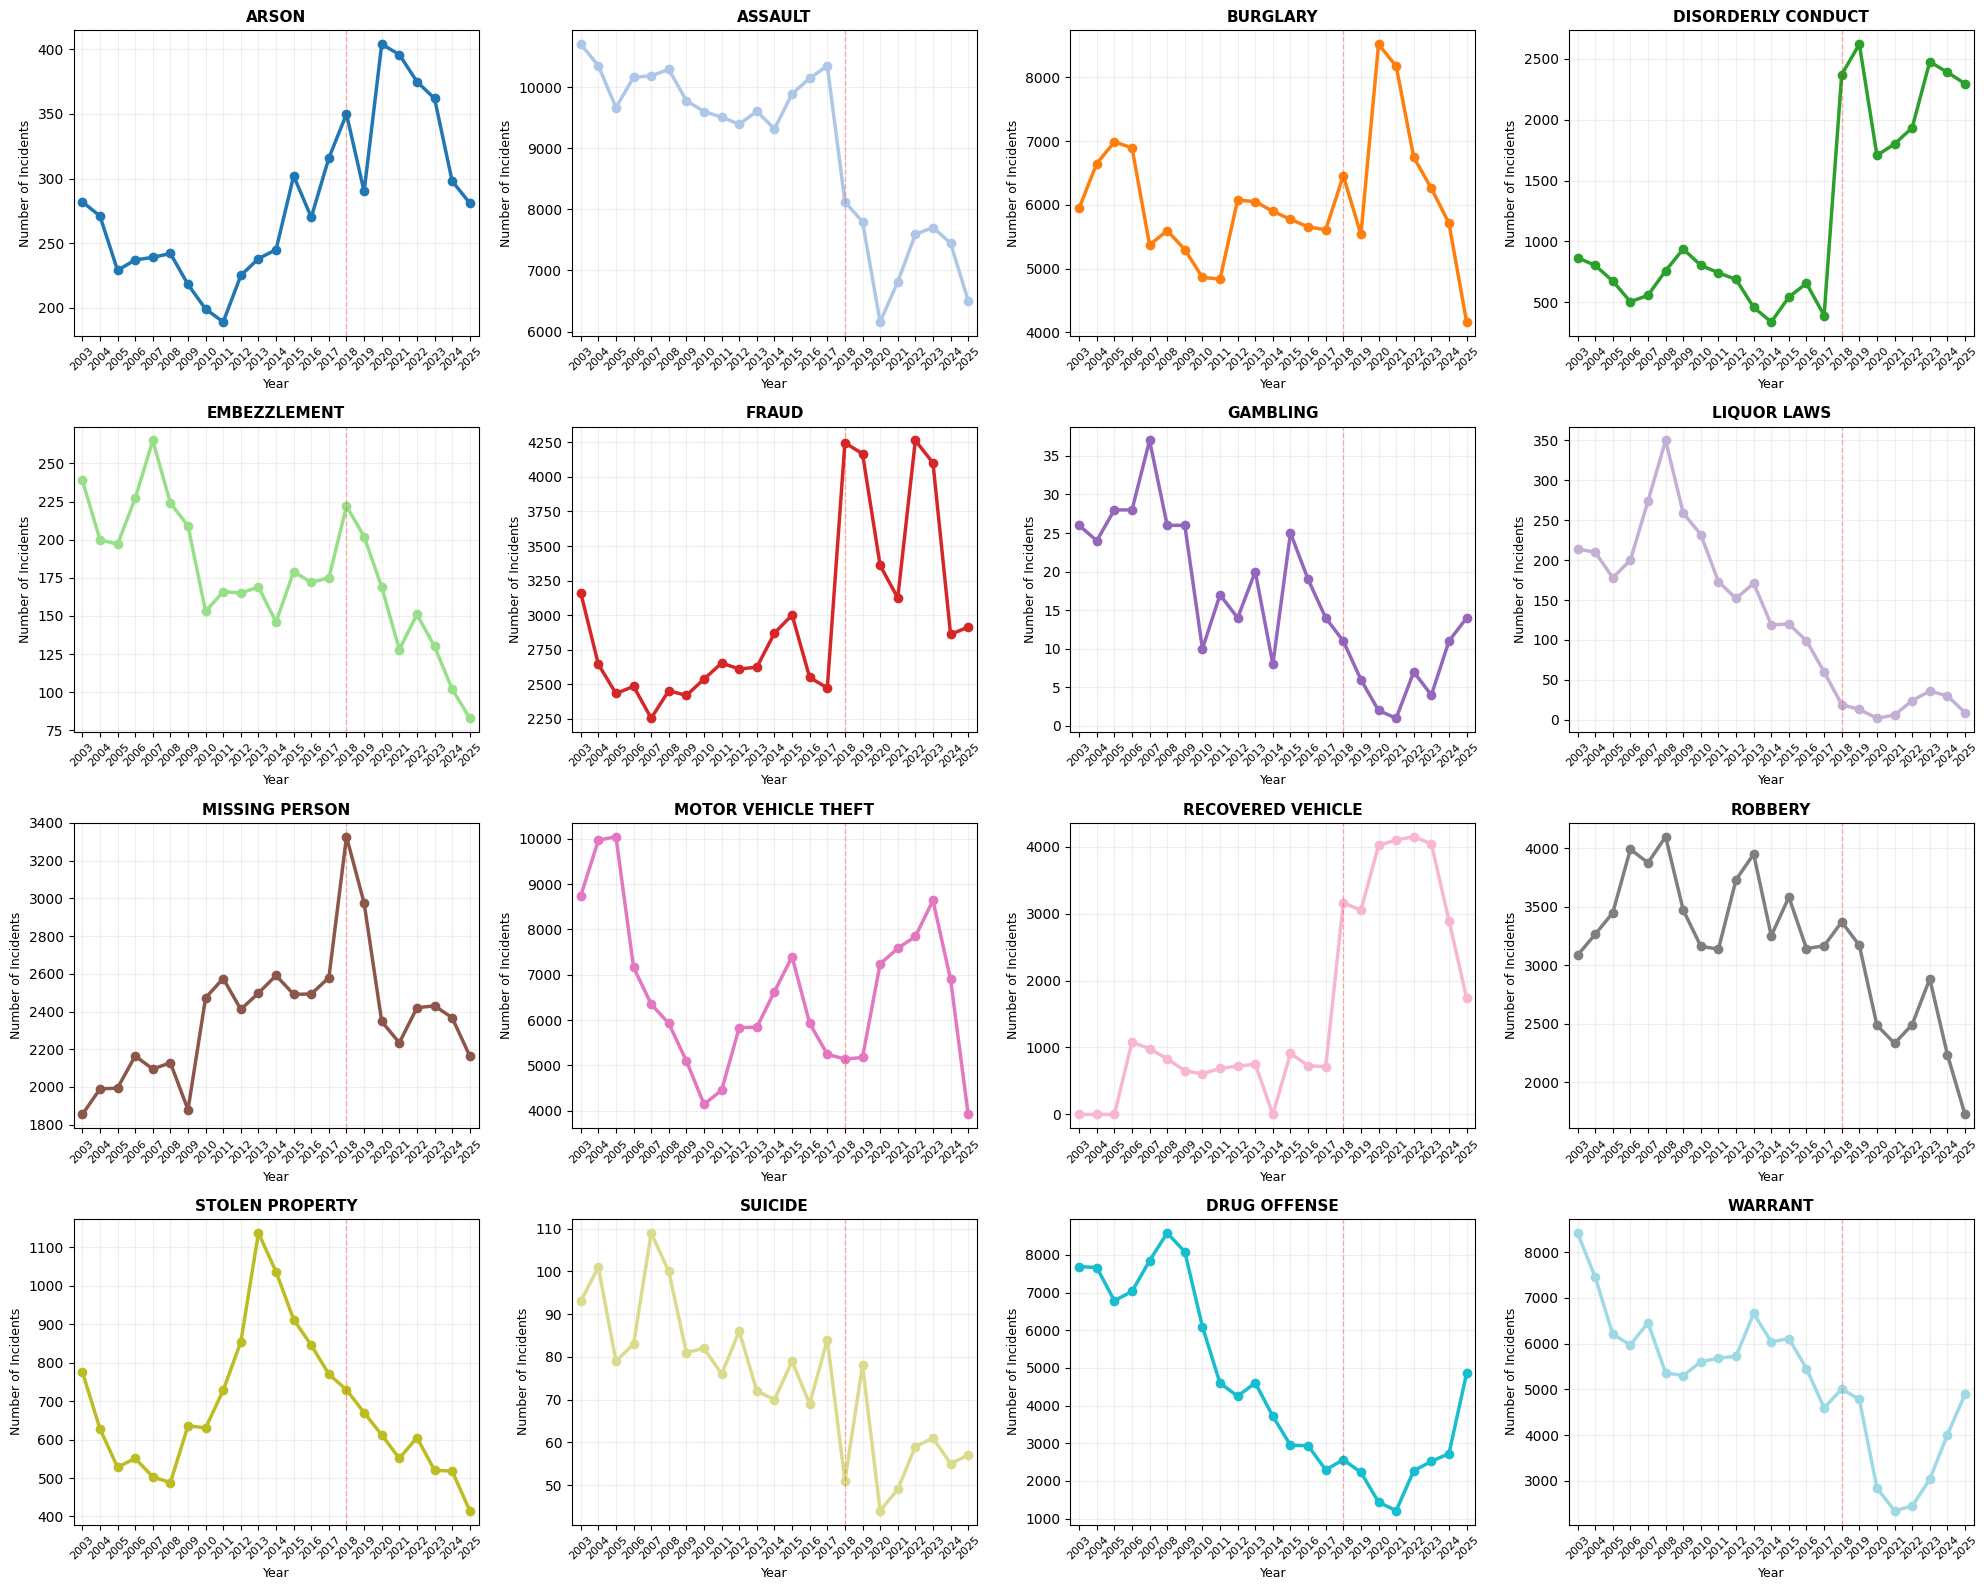

✓ Combined plot saved as 'yearly_crime_trends_combined.png'


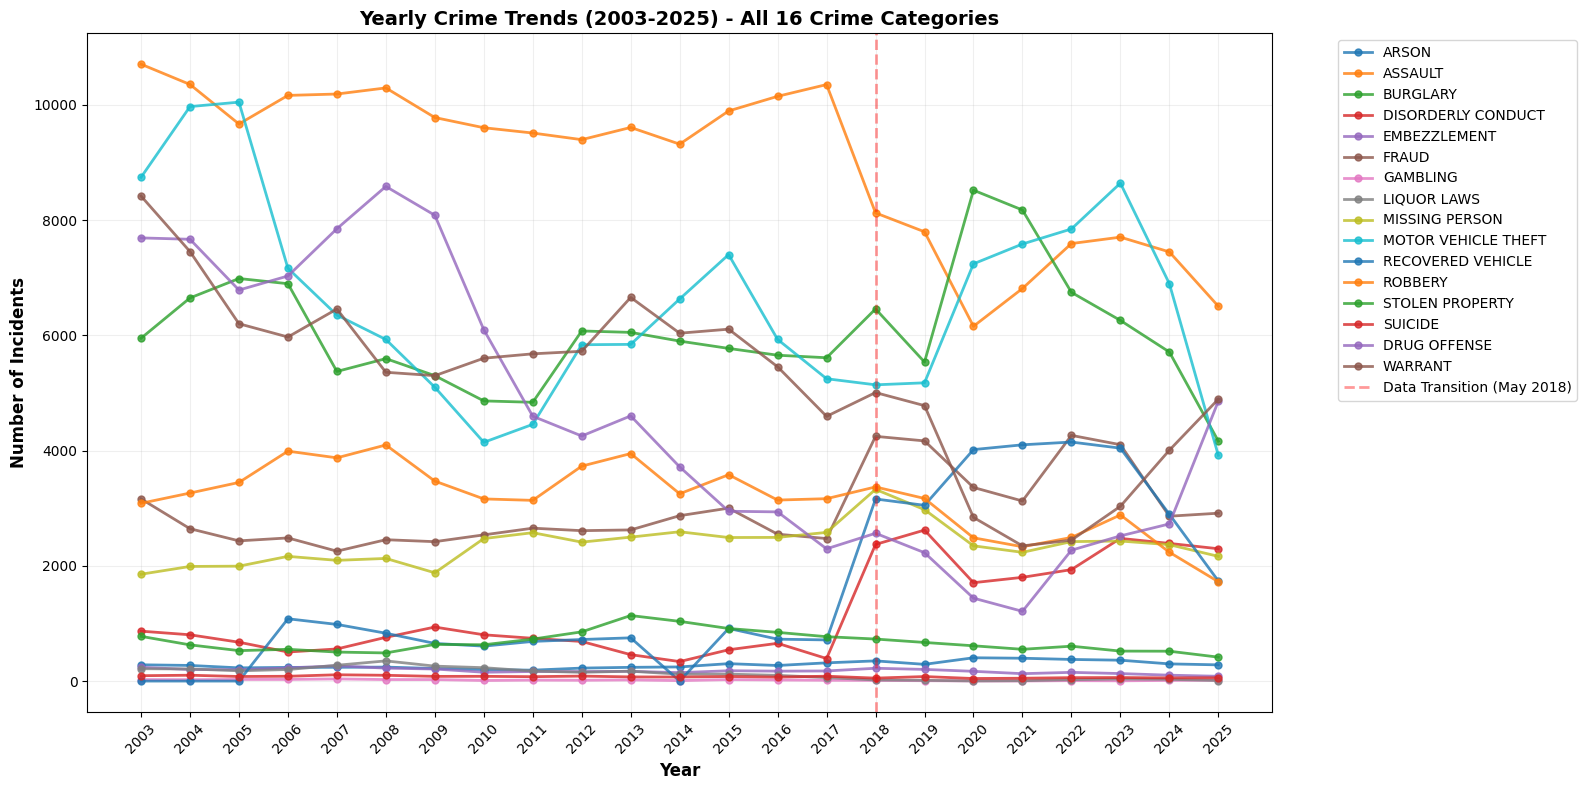


SUMMARY STATISTICS BY CRIME TYPE

            Category  Total    Avg/Year  Min   Max     Std Dev
            ASSAULT 207126 9005.478261 6157 10706 1394.912603
MOTOR VEHICLE THEFT 151234 6575.391304 3919 10047 1707.541607
           BURGLARY 139085 6047.173913 4165  8519  994.392855
            WARRANT 120364 5233.217391 2346  8418 1524.102208
       DRUG OFFENSE 104951 4563.086957 1210  8584 2400.042498
            ROBBERY  73028 3175.130435 1724  4097  603.864622
              FRAUD  68205 2965.434783 2254  4264  637.360240
     MISSING PERSON  54479 2368.652174 1854  3327  337.996182
  RECOVERED VEHICLE  35815 1885.000000  606  4148 1428.090217
 DISORDERLY CONDUCT  27310 1187.391304  338  2620  791.935588
    STOLEN PROPERTY  15642  680.086957  415  1137  182.541132
              ARSON   6458  280.782609  189   404   61.839937
       EMBEZZLEMENT   4073  177.086957   83   265   44.009207
        LIQUOR LAWS   2950  128.260870    2   350  102.102986
            SUICIDE   1718   74.69

In [247]:

# Create comprehensive line plots for yearly crime counts (2003-2025)
import matplotlib.pyplot as plt
import numpy as np

print("=" * 80)
print("YEARLY CRIME TRENDS VISUALIZATION (2003-2025)")
print("=" * 80)

# Get yearly counts by category from merged dataset
yearly_crimes = df_merged.groupby(['Incident Year', 'Incident Category']).size().reset_index(name='count')

# Define the 16 crime categories
crime_categories = [
    'ARSON',
    'ASSAULT',
    'BURGLARY',
    'DISORDERLY CONDUCT',
    'EMBEZZLEMENT',
    'FRAUD',
    'GAMBLING',
    'LIQUOR LAWS',
    'MISSING PERSON',
    'MOTOR VEHICLE THEFT',
    'RECOVERED VEHICLE',
    'ROBBERY',
    'STOLEN PROPERTY',
    'SUICIDE',
    'DRUG OFFENSE',
    'WARRANT'
]

print(f"\nData range: {df_merged['Incident Year'].min()} to {df_merged['Incident Year'].max()}")
print(f"Total records: {len(df_merged):,}")
print(f"\nPlotting trends for {len(crime_categories)} crime categories...\n")

# Create individual plots for each crime category
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

colors = plt.cm.tab20(np.linspace(0, 1, len(crime_categories)))

for idx, category in enumerate(crime_categories):
    ax = axes[idx]
    
    # Get data for this category
    cat_data = yearly_crimes[yearly_crimes['Incident Category'] == category].sort_values('Incident Year')
    
    # Create complete year range (2003-2025) and fill missing years with 0
    all_years = pd.DataFrame({'Incident Year': range(2003, 2026)})
    cat_data_complete = all_years.merge(cat_data, on='Incident Year', how='left').fillna(0)
    
    # Plot line with markers for all years
    ax.plot(cat_data_complete['Incident Year'], cat_data_complete['count'], 
            marker='o', linewidth=2.5, markersize=6, 
            color=colors[idx], label=category)
    
    # Add vertical line at 2018 to show transition
    ax.axvline(x=2018, color='red', linestyle='--', alpha=0.3, linewidth=1)
    
    # Formatting
    ax.set_title(category, fontsize=11, fontweight='bold')
    ax.set_xlabel('Year', fontsize=9)
    ax.set_ylabel('Number of Incidents', fontsize=9)
    ax.grid(True, alpha=0.2)
    ax.set_xlim(2002.5, 2025.5)
    
    # Set x-axis to show every year
    ax.set_xticks(range(2003, 2026))
    ax.set_xticklabels(range(2003, 2026), rotation=45, fontsize=8)
    
    # Format y-axis
    ax.ticklabel_format(style='plain', axis='y')
    
    # Print summary statistics
    if len(cat_data) > 0:
        min_year = cat_data[cat_data['count'] == cat_data['count'].min()]['Incident Year'].values[0]
        max_year = cat_data[cat_data['count'] == cat_data['count'].max()]['Incident Year'].values[0]
        print(f"{category:<30} | Total: {cat_data['count'].sum():>6} | Min: {int(cat_data['count'].min()):>5} ({int(min_year)}) | Max: {int(cat_data['count'].max()):>5} ({int(max_year)})")

plt.tight_layout()
plt.savefig('yearly_crime_trends_by_category.png', dpi=300, bbox_inches='tight')
print("\n✓ Individual category plots saved as 'yearly_crime_trends_by_category.png'")
plt.show()

# Create a combined plot with all categories
fig, ax = plt.subplots(figsize=(16, 8))

for idx, category in enumerate(crime_categories):
    cat_data = yearly_crimes[yearly_crimes['Incident Category'] == category].sort_values('Incident Year')
    
    # Create complete year range (2003-2025) and fill missing years with 0
    all_years = pd.DataFrame({'Incident Year': range(2003, 2026)})
    cat_data_complete = all_years.merge(cat_data, on='Incident Year', how='left').fillna(0)
    
    ax.plot(cat_data_complete['Incident Year'], cat_data_complete['count'], 
            marker='o', linewidth=2, markersize=5,
            label=category, alpha=0.8)

# Add vertical line at transition
ax.axvline(x=2018, color='red', linestyle='--', alpha=0.4, linewidth=2, label='Data Transition (May 2018)')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Incidents', fontsize=12, fontweight='bold')
ax.set_title('Yearly Crime Trends (2003-2025) - All 16 Crime Categories', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax.grid(True, alpha=0.2)

# Set x-axis to show every year
ax.set_xticks(range(2003, 2026))
ax.set_xticklabels(range(2003, 2026), rotation=45)

plt.tight_layout()
plt.savefig('yearly_crime_trends_combined.png', dpi=300, bbox_inches='tight')
print("✓ Combined plot saved as 'yearly_crime_trends_combined.png'")
plt.show()

print("\n" + "=" * 80)
print("SUMMARY STATISTICS BY CRIME TYPE")
print("=" * 80)

summary_stats = []
for category in crime_categories:
    cat_data = yearly_crimes[yearly_crimes['Incident Category'] == category]
    if len(cat_data) > 0:
        summary_stats.append({
            'Category': category,
            'Total': cat_data['count'].sum(),
            'Avg/Year': cat_data['count'].mean(),
            'Min': cat_data['count'].min(),
            'Max': cat_data['count'].max(),
            'Std Dev': cat_data['count'].std()
        })

summary_df = pd.DataFrame(summary_stats).sort_values('Total', ascending=False)
print("\n", summary_df.to_string(index=False))

Vandalism is under Malicious Mischief in the new data so removed it. 


In the end decided to keep the plots that look like a plausible transition for 2018, they are quite similar, there is no big shift in the overall trend.

In [248]:
# Filter df_merged to keep only selected categories

selected_categories = [
    'ARSON',
    'EMBEZZLEMENT',
    'GAMBLING',
    'LIQUOR LAWS',
    'MOTOR VEHICLE THEFT',
    'ROBBERY',
    'STOLEN PROPERTY',
    'SUICIDE',
    'DRUG OFFENSE',
    'WARRANT'
]

print("=" * 80)
print("FILTERING TO SELECTED CATEGORIES FOR ANALYSIS")
print("=" * 80)

df_selected = df_merged[df_merged['Incident Category'].isin(selected_categories)].copy()

print(f"\nOriginal merged dataset: {len(df_merged):,} records")
print(f"Filtered dataset: {len(df_selected):,} records")
print(f"Unique categories: {df_selected['Incident Category'].nunique()}")

print(f"\nCategories in filtered dataset:")
for cat in sorted(df_selected['Incident Category'].unique()):
    count = len(df_selected[df_selected['Incident Category'] == cat])
    print(f"  {cat:<30} {count:>8} records")

print(f"\nDate range: {df_selected['Incident Date'].min().date()} to {df_selected['Incident Date'].max().date()}")
print(f"Year range: {df_selected['Incident Year'].min()} to {df_selected['Incident Year'].max()}")

# Save the filtered dataset
output_filename = 'merged_crime_data_selected.csv'
df_selected.to_csv(output_filename, index=False)
print(f"\n✓ Filtered dataset saved as: {output_filename}")

FILTERING TO SELECTED CATEGORIES FOR ANALYSIS

Original merged dataset: 1,012,816 records
Filtered dataset: 480,796 records
Unique categories: 10

Categories in filtered dataset:
  ARSON                              6458 records
  DRUG OFFENSE                     104951 records
  EMBEZZLEMENT                       4073 records
  GAMBLING                            378 records
  LIQUOR LAWS                        2950 records
  MOTOR VEHICLE THEFT              151234 records
  ROBBERY                           73028 records
  STOLEN PROPERTY                   15642 records
  SUICIDE                            1718 records
  WARRANT                          120364 records

Date range: 2003-01-01 to 2025-12-31
Year range: 2003 to 2025

✓ Filtered dataset saved as: merged_crime_data_selected.csv


YEARLY CRIME TRENDS VISUALIZATION - SELECTED CATEGORIES (2003-2025)

Data range: 2003 to 2025
Total records: 480,796

Plotting trends for 10 crime categories...

ARSON                          | Total:   6458 | Min:   189 (2011) | Max:   404 (2020)
EMBEZZLEMENT                   | Total:   4073 | Min:    83 (2025) | Max:   265 (2007)
GAMBLING                       | Total:    378 | Min:     1 (2021) | Max:    37 (2007)
LIQUOR LAWS                    | Total:   2950 | Min:     2 (2020) | Max:   350 (2008)
MOTOR VEHICLE THEFT            | Total: 151234 | Min:  3919 (2025) | Max: 10047 (2005)
ROBBERY                        | Total:  73028 | Min:  1724 (2025) | Max:  4097 (2008)
STOLEN PROPERTY                | Total:  15642 | Min:   415 (2025) | Max:  1137 (2013)
SUICIDE                        | Total:   1718 | Min:    44 (2020) | Max:   109 (2007)
DRUG OFFENSE                   | Total: 104951 | Min:  1210 (2021) | Max:  8584 (2008)
WARRANT                        | Total: 120364 | Min:  

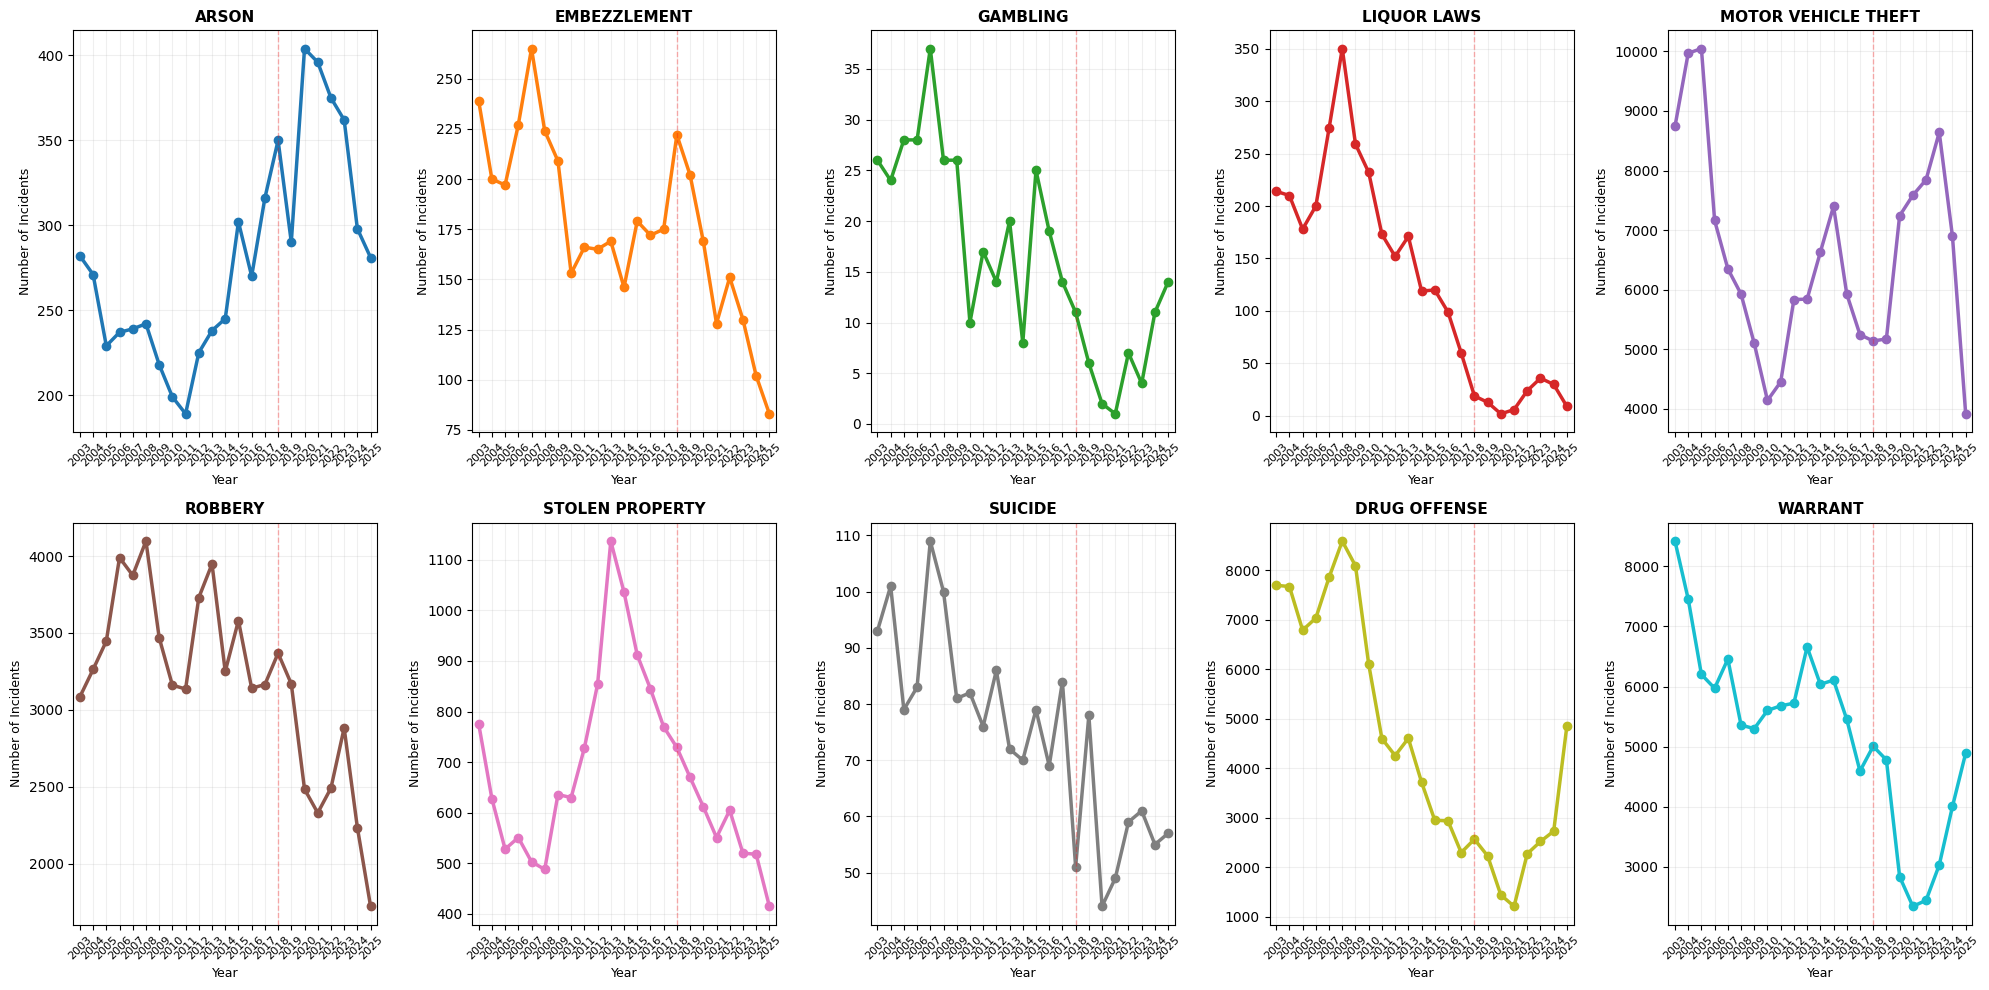

✓ Combined plot saved as 'yearly_crime_trends_selected_combined.png'


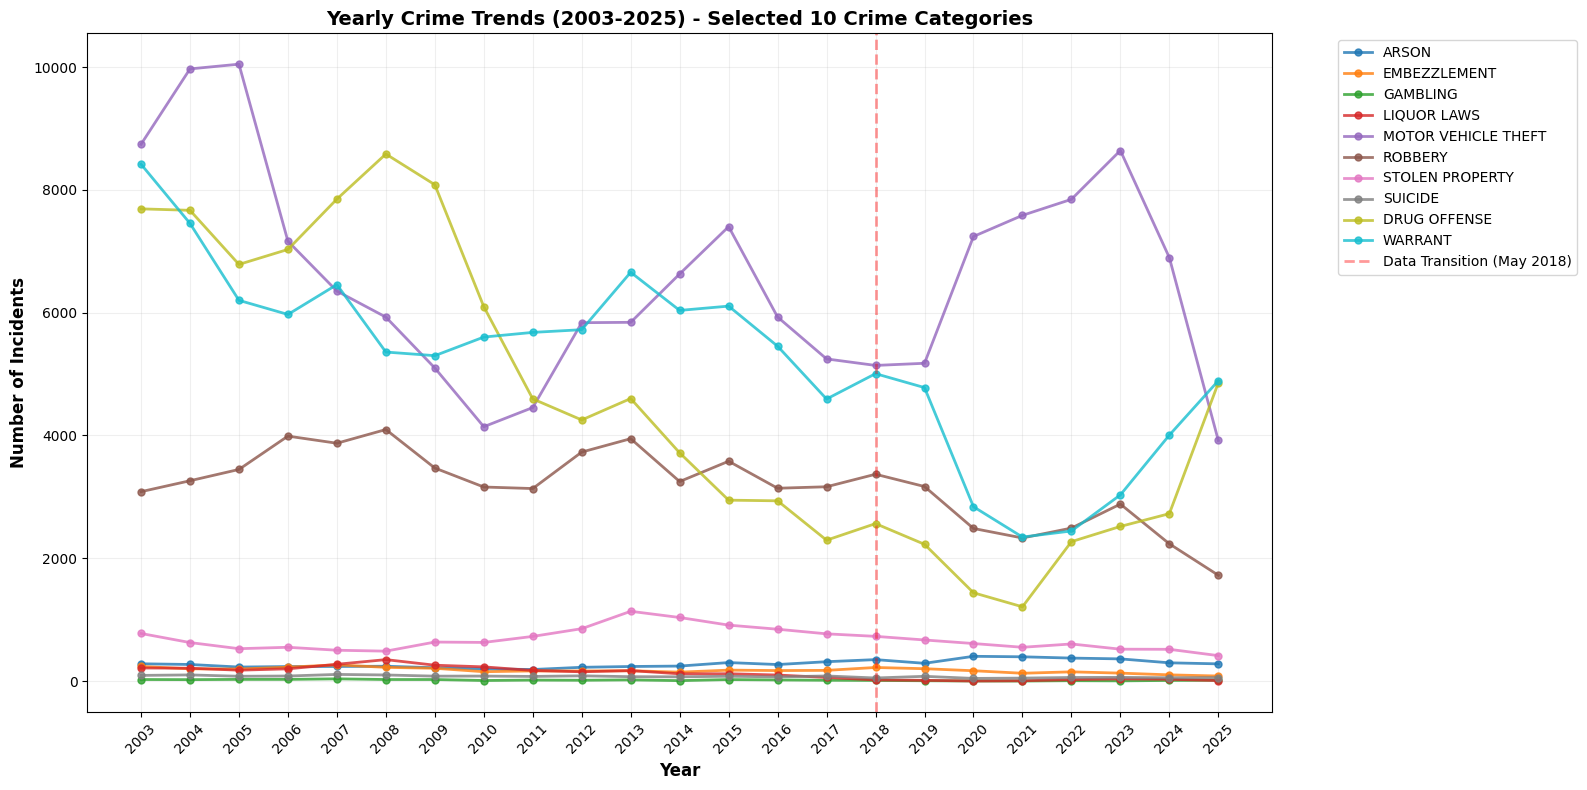


SUMMARY STATISTICS - SELECTED CATEGORIES

            Category  Total    Avg/Year  Min   Max     Std Dev
MOTOR VEHICLE THEFT 151234 6575.391304 3919 10047 1707.541607
            WARRANT 120364 5233.217391 2346  8418 1524.102208
       DRUG OFFENSE 104951 4563.086957 1210  8584 2400.042498
            ROBBERY  73028 3175.130435 1724  4097  603.864622
    STOLEN PROPERTY  15642  680.086957  415  1137  182.541132
              ARSON   6458  280.782609  189   404   61.839937
       EMBEZZLEMENT   4073  177.086957   83   265   44.009207
        LIQUOR LAWS   2950  128.260870    2   350  102.102986
            SUICIDE   1718   74.695652   44   109   17.360967
           GAMBLING    378   16.434783    1    37    9.778576


In [249]:
# Create comprehensive line plots for yearly crime counts for selected categories (2003-2025)
import matplotlib.pyplot as plt
import numpy as np

print("=" * 80)
print("YEARLY CRIME TRENDS VISUALIZATION - SELECTED CATEGORIES (2003-2025)")
print("=" * 80)

# Get yearly counts by category from selected dataset
yearly_crimes_selected = df_selected.groupby(['Incident Year', 'Incident Category']).size().reset_index(name='count')

print(f"\nData range: {df_selected['Incident Year'].min()} to {df_selected['Incident Year'].max()}")
print(f"Total records: {len(df_selected):,}")
print(f"\nPlotting trends for {len(selected_categories)} crime categories...\n")

# Create individual plots for each crime category
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

colors = plt.cm.tab10(np.linspace(0, 1, len(selected_categories)))

for idx, category in enumerate(selected_categories):
    ax = axes[idx]
    
    # Get data for this category
    cat_data = yearly_crimes_selected[yearly_crimes_selected['Incident Category'] == category].sort_values('Incident Year')
    
    # Create complete year range (2003-2025) and fill missing years with 0
    all_years = pd.DataFrame({'Incident Year': range(2003, 2026)})
    cat_data_complete = all_years.merge(cat_data, on='Incident Year', how='left').fillna(0)
    
    # Plot line with markers for all years
    ax.plot(cat_data_complete['Incident Year'], cat_data_complete['count'], 
            marker='o', linewidth=2.5, markersize=6, 
            color=colors[idx], label=category)
    
    # Add vertical line at 2018 to show transition
    ax.axvline(x=2018, color='red', linestyle='--', alpha=0.3, linewidth=1)
    
    # Formatting
    ax.set_title(category, fontsize=11, fontweight='bold')
    ax.set_xlabel('Year', fontsize=9)
    ax.set_ylabel('Number of Incidents', fontsize=9)
    ax.grid(True, alpha=0.2)
    ax.set_xlim(2002.5, 2025.5)
    
    # Set x-axis to show every year
    ax.set_xticks(range(2003, 2026))
    ax.set_xticklabels(range(2003, 2026), rotation=45, fontsize=8)
    
    # Format y-axis
    ax.ticklabel_format(style='plain', axis='y')
    
    # Print summary statistics
    if len(cat_data) > 0:
        min_year = cat_data[cat_data['count'] == cat_data['count'].min()]['Incident Year'].values[0]
        max_year = cat_data[cat_data['count'] == cat_data['count'].max()]['Incident Year'].values[0]
        print(f"{category:<30} | Total: {cat_data['count'].sum():>6} | Min: {int(cat_data['count'].min()):>5} ({int(min_year)}) | Max: {int(cat_data['count'].max()):>5} ({int(max_year)})")

plt.tight_layout()
plt.savefig('yearly_crime_trends_selected_categories.png', dpi=300, bbox_inches='tight')
print("\n✓ Selected category plots saved as 'yearly_crime_trends_selected_categories.png'")
plt.show()

# Create a combined plot with all selected categories
fig, ax = plt.subplots(figsize=(16, 8))

for idx, category in enumerate(selected_categories):
    cat_data = yearly_crimes_selected[yearly_crimes_selected['Incident Category'] == category].sort_values('Incident Year')
    
    # Create complete year range (2003-2025) and fill missing years with 0
    all_years = pd.DataFrame({'Incident Year': range(2003, 2026)})
    cat_data_complete = all_years.merge(cat_data, on='Incident Year', how='left').fillna(0)
    
    ax.plot(cat_data_complete['Incident Year'], cat_data_complete['count'], 
            marker='o', linewidth=2, markersize=5,
            label=category, alpha=0.8)

# Add vertical line at transition
ax.axvline(x=2018, color='red', linestyle='--', alpha=0.4, linewidth=2, label='Data Transition (May 2018)')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Incidents', fontsize=12, fontweight='bold')
ax.set_title('Yearly Crime Trends (2003-2025) - Selected 10 Crime Categories', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax.grid(True, alpha=0.2)

# Set x-axis to show every year
ax.set_xticks(range(2003, 2026))
ax.set_xticklabels(range(2003, 2026), rotation=45)

plt.tight_layout()
plt.savefig('yearly_crime_trends_selected_combined.png', dpi=300, bbox_inches='tight')
print("✓ Combined plot saved as 'yearly_crime_trends_selected_combined.png'")
plt.show()

print("\n" + "=" * 80)
print("SUMMARY STATISTICS - SELECTED CATEGORIES")
print("=" * 80)

summary_stats = []
for category in selected_categories:
    cat_data = yearly_crimes_selected[yearly_crimes_selected['Incident Category'] == category]
    if len(cat_data) > 0:
        summary_stats.append({
            'Category': category,
            'Total': cat_data['count'].sum(),
            'Avg/Year': cat_data['count'].mean(),
            'Min': cat_data['count'].min(),
            'Max': cat_data['count'].max(),
            'Std Dev': cat_data['count'].std()
        })

summary_df = pd.DataFrame(summary_stats).sort_values('Total', ascending=False)
print("\n", summary_df.to_string(index=False))